# UTMB - Relative Pacing

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Relative pacing is a key attribute of analysing race data. It puts all runners on a level pedestal by dividing the stage kilometre pace by the average 1-kilometre pace. This makes it easier to compare stages. For example if a runner runs a stage relatively in 0.5, they are twice as fast as the average pace. This gives an insight to the most difficult stages. 

I read in the dataset with the 1km splits

In [2]:
df = pd.read_csv('../../data/1km_splits_full.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,bib,name_mask,team,gender,category,rank,nationality,...,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,time,timediff,AVG_Pace
0,0,NaN,2017,4.0,7efc0cb7e70d7cd9da46a58bbf01af66,Salomon,Male,Senior Men (23-39),NaN,FR,...,NaN,NaN,7.788288,NaN,NaN,9.016667,5.236486,1141.900000,NaN,7.012357
1,1,NaN,2017,NaN,1e4ba9a22b3fecb9136ecfcf7f470868,Salomon,Male,Senior Men (23-39),NaN,ES,...,NaN,NaN,7.869369,NaN,NaN,9.300000,5.072072,1156.983333,15.083333,7.097568
2,2,NaN,2017,14.0,0d928f7482046900e19dba217d7befa5,Hoka,Male,Senior Men (23-39),3.0,US,...,NaN,NaN,7.918919,NaN,NaN,9.804762,4.772523,1193.000000,51.100000,7.352225
3,3,3.0,2017,7.0,93f20063908ba5d48724dcf31740a52a,Asics,Male,Senior Men (23-39),4.0,FR,...,NaN,NaN,7.585586,NaN,NaN,9.238095,4.808559,1203.650000,61.750000,7.466542
4,4,4.0,2017,NaN,7479fb90beffad048c5f772ba1915b4e,Hoka,Male,Senior Men (23-39),5.0,US,...,NaN,NaN,8.414414,NaN,NaN,10.057143,5.141892,1211.633333,69.733333,7.211069


In [4]:
df_non_stage = df[[ 'Unnamed: 0'  ,  'Year', 
'bib'              ,
'name_mask'           ,
'team'           ,
'gender',
'category'        , 
'rank'             ,
'nationality', 
    'time', 
                   'timediff'
 ]]

Dividing each stage by the average pace of that runner...

In [5]:
df1 = df.loc[:, 'Chamonix to Delevret':'Flegere to Chamonix'].div(df['AVG_Pace'], axis=0)

Again, any value below 1 is faster than the average pace, and above 1 is slower that the average pace...

In [6]:
pd.set_option('display.max_columns', None)
df1

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0.753222,NaN,NaN,0.623899,NaN,0.776253,0.924588,1.411793,0.710231,1.170149,0.576727,1.345244,0.746830,0.805199,NaN,NaN,1.518699,0.954236,0.925107,1.694363,0.759136,0.813869,NaN,NaN,1.145260,NaN,NaN,0.870184,NaN,1.227001,NaN,1.104782,NaN,NaN,1.110652,NaN,NaN,1.285825,0.746751
1,0.725186,NaN,NaN,0.636801,NaN,0.775141,0.917256,1.423023,0.700323,1.141054,0.570283,1.328507,0.740473,0.809278,NaN,NaN,1.572350,0.970387,0.959610,1.722551,0.757536,0.817181,NaN,NaN,1.237284,NaN,NaN,0.812772,NaN,1.229881,NaN,1.019452,NaN,NaN,1.108742,NaN,NaN,1.310308,0.714621
2,0.754073,NaN,NaN,0.594760,NaN,0.748073,0.949574,1.464821,0.773853,1.198589,0.605583,1.362966,0.765704,0.855888,NaN,NaN,1.552124,0.949336,0.886702,NaN,1.507707,0.798430,NaN,NaN,1.173967,NaN,NaN,0.724016,NaN,1.254344,NaN,1.019708,NaN,NaN,1.077078,NaN,NaN,1.333577,0.649126
3,0.707568,NaN,NaN,0.586535,NaN,0.728818,0.869172,1.566990,0.769008,1.219464,0.644599,1.368884,0.760429,0.872728,NaN,NaN,1.652724,0.970093,0.970140,1.775327,0.692422,0.782060,NaN,NaN,1.139795,NaN,NaN,0.819529,NaN,1.219328,NaN,0.987162,NaN,NaN,1.015944,NaN,NaN,1.237265,0.644014
4,0.713602,NaN,NaN,0.588763,NaN,0.774160,0.917371,1.371209,0.689753,1.143962,0.541024,1.160253,0.715978,0.835437,NaN,NaN,1.507509,0.979475,0.894280,1.649727,0.813795,1.041884,NaN,NaN,1.669222,NaN,NaN,0.692907,NaN,1.134444,NaN,0.890633,NaN,NaN,1.166875,NaN,NaN,1.394681,0.713055
5,0.717753,NaN,NaN,0.587272,NaN,0.739673,0.876150,1.421946,0.756722,1.160927,0.579603,1.383390,0.695766,0.784768,NaN,NaN,1.605579,0.997138,0.980876,1.896332,0.772744,0.788446,NaN,NaN,1.132273,NaN,NaN,0.808454,NaN,1.224529,NaN,1.027952,NaN,NaN,1.104263,NaN,NaN,1.350399,0.607045
6,0.725346,NaN,NaN,0.606193,NaN,0.739465,0.909164,1.429073,0.764938,1.160973,0.601523,1.327686,0.748421,0.836010,NaN,NaN,1.486195,0.915326,0.892783,NaN,1.558703,0.816052,NaN,NaN,1.137932,NaN,NaN,0.788934,NaN,1.311090,NaN,1.011406,NaN,NaN,1.143484,NaN,NaN,1.399444,0.689858
7,0.670439,NaN,NaN,0.551381,NaN,0.673370,0.779177,1.376796,0.718506,1.078625,0.574871,1.316824,0.731057,0.849314,NaN,NaN,NaN,2.032203,0.914915,1.764181,0.735333,0.795753,NaN,NaN,1.145312,NaN,NaN,0.818021,NaN,1.316141,NaN,1.069808,NaN,NaN,1.087198,NaN,NaN,1.342925,0.657852
8,0.634485,NaN,NaN,0.614362,NaN,0.668097,0.806405,1.270976,0.755879,1.039373,0.580293,1.259808,0.703606,0.806851,NaN,NaN,1.529825,0.939087,0.995969,1.714239,0.737484,0.771877,NaN,NaN,1.088401,NaN,NaN,0.894566,NaN,1.372802,NaN,1.177586,NaN,NaN,1.526434,NaN,NaN,1.403948,0.707650
9,0.689516,NaN,NaN,0.538456,NaN,0.684832,0.852428,1.359319,0.701698,1.167191,0.586638,1.385489,0.716100,0.776367,NaN,NaN,1.659746,1.008626,0.948272,1.769081,0.680940,0.867151,NaN,NaN,1.200805,NaN,NaN,0.729494,NaN,1.290051,NaN,1.055131,NaN,NaN,1.139601,NaN,NaN,1.419808,0.773261


In [7]:
des = df1.describe()

In [8]:
pd.set_option('display.max_columns', None)
des

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
count,14876.000000,1423.000000,2281.000000,14866.000000,2090.000000,19202.000000,18400.000000,18257.000000,18279.000000,17545.000000,17487.000000,16950.000000,16804.000000,16920.000000,4154.000000,1993.000000,13413.000000,15222.000000,15098.000000,14121.000000,14070.000000,12955.000000,4498.000000,1189.000000,6586.000000,4478.000000,1171.000000,6576.000000,10279.000000,1702.000000,10286.000000,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000
mean,0.622081,0.401450,0.590125,0.541825,1.181056,0.709813,0.870699,1.224550,0.713571,1.008524,0.830711,1.282120,0.682165,0.821890,2.667199,1.484148,1.746171,0.859237,0.906194,1.558728,0.744611,0.915720,1.279973,1.255935,1.277056,1.069963,1.300974,0.925594,1.583509,1.457806,0.830074,1.196277,1.442096,0.883971,1.387379,1.053348,0.893650,1.320420,0.759243
std,0.113144,0.096696,0.105927,0.123561,0.621565,0.152407,0.137874,0.171411,0.155860,0.129484,0.340049,0.193202,0.135010,0.209363,1.197969,0.253914,0.333147,0.127117,0.166449,0.221193,0.149422,0.127116,0.200803,0.235297,0.172420,0.174764,0.209904,0.210070,0.272511,0.268796,0.172387,0.177533,0.209751,0.161387,0.323242,0.322989,0.166836,0.193581,0.177008
min,0.316380,0.200993,0.113006,0.243049,0.138907,0.112865,0.150230,0.140398,0.219135,0.457215,0.135125,0.401867,0.219137,0.156866,0.137716,0.941639,0.727714,0.526027,0.309790,0.821684,0.317904,0.399994,0.648498,0.677944,0.798841,0.340754,0.766191,0.512954,0.869144,0.916388,0.352344,0.736503,0.824918,0.535007,0.735447,0.479421,0.516093,0.774316,0.261516
25%,0.552414,0.338886,0.533147,0.467061,0.634080,0.625288,0.786544,1.120922,0.623290,0.928262,0.600557,1.167170,0.604938,0.713391,1.874636,1.328327,1.571147,0.786421,0.813036,1.421695,0.653601,0.834809,1.147920,1.134316,1.162571,0.968947,1.163169,0.804809,1.432912,1.295049,0.727281,1.093349,1.309622,0.785162,1.205737,0.913235,0.779481,1.198373,0.644240
50%,0.603230,0.377217,0.573142,0.518189,0.825664,0.679685,0.851785,1.207297,0.691206,0.994741,0.677393,1.260289,0.666545,0.788535,2.657232,1.423969,1.760681,0.840522,0.879366,1.530784,0.710860,0.899892,1.253388,1.222474,1.252781,1.062681,1.281785,0.907699,1.551941,1.418646,0.811626,1.187710,1.423249,0.859324,1.342862,1.021805,0.876558,1.303897,0.741237
75%,0.661502,0.426914,0.616045,0.582969,1.856351,0.748002,0.928489,1.300607,0.770247,1.068673,1.095608,1.362959,0.732247,0.875856,3.426818,1.578852,1.939325,0.909575,0.960700,1.656987,0.785584,0.976086,1.378682,1.325159,1.357239,1.150902,1.427029,1.014516,1.690931,1.563617,0.911847,1.283895,1.549793,0.954102,1.501128,1.143807,0.994875,1.415982,0.850239
max,1.193296,1.178277,1.161533,1.647459,2.731925,1.992614,2.773105,2.963674,2.874221,2.721009,3.714351,4.544445,2.781339,5.199426,8.337885,3.280075,4.451128,2.943446,4.048218,5.249817,2.545999,3.371058,3.175288,5.295099,3.127493,3.358973,2.897426,4.303148,7.625359,5.001980,3.782223,4.397996,4.309459,2.908446,6.741470,8.159805,1.586393,3.821133,3.433522


I wanted to find out what the most significant stage was in the race in terms of time. I made new columns called max_stage and max_val which contained the name of the stage with the longest time, and the time respectively. 

In [9]:
des['max_stage'] = des.idxmax(axis = 1)
des['max_val'] = des.max(axis = 1)
des

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,max_stage,max_val
count,14876.000000,1423.000000,2281.000000,14866.000000,2090.000000,19202.000000,18400.000000,18257.000000,18279.000000,17545.000000,17487.000000,16950.000000,16804.000000,16920.000000,4154.000000,1993.000000,13413.000000,15222.000000,15098.000000,14121.000000,14070.000000,12955.000000,4498.000000,1189.000000,6586.000000,4478.000000,1171.000000,6576.000000,10279.000000,1702.000000,10286.000000,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000,St-Gervais to Contamines,19202.000000
mean,0.622081,0.401450,0.590125,0.541825,1.181056,0.709813,0.870699,1.224550,0.713571,1.008524,0.830711,1.282120,0.682165,0.821890,2.667199,1.484148,1.746171,0.859237,0.906194,1.558728,0.744611,0.915720,1.279973,1.255935,1.277056,1.069963,1.300974,0.925594,1.583509,1.457806,0.830074,1.196277,1.442096,0.883971,1.387379,1.053348,0.893650,1.320420,0.759243,Courmayeur to Courmayeur2,2.667199
std,0.113144,0.096696,0.105927,0.123561,0.621565,0.152407,0.137874,0.171411,0.155860,0.129484,0.340049,0.193202,0.135010,0.209363,1.197969,0.253914,0.333147,0.127117,0.166449,0.221193,0.149422,0.127116,0.200803,0.235297,0.172420,0.174764,0.209904,0.210070,0.272511,0.268796,0.172387,0.177533,0.209751,0.161387,0.323242,0.322989,0.166836,0.193581,0.177008,Courmayeur to Courmayeur2,1.197969
min,0.316380,0.200993,0.113006,0.243049,0.138907,0.112865,0.150230,0.140398,0.219135,0.457215,0.135125,0.401867,0.219137,0.156866,0.137716,0.941639,0.727714,0.526027,0.309790,0.821684,0.317904,0.399994,0.648498,0.677944,0.798841,0.340754,0.766191,0.512954,0.869144,0.916388,0.352344,0.736503,0.824918,0.535007,0.735447,0.479421,0.516093,0.774316,0.261516,Courmayeur2 to Bertone,0.941639
25%,0.552414,0.338886,0.533147,0.467061,0.634080,0.625288,0.786544,1.120922,0.623290,0.928262,0.600557,1.167170,0.604938,0.713391,1.874636,1.328327,1.571147,0.786421,0.813036,1.421695,0.653601,0.834809,1.147920,1.134316,1.162571,0.968947,1.163169,0.804809,1.432912,1.295049,0.727281,1.093349,1.309622,0.785162,1.205737,0.913235,0.779481,1.198373,0.644240,Courmayeur to Courmayeur2,1.874636
50%,0.603230,0.377217,0.573142,0.518189,0.825664,0.679685,0.851785,1.207297,0.691206,0.994741,0.677393,1.260289,0.666545,0.788535,2.657232,1.423969,1.760681,0.840522,0.879366,1.530784,0.710860,0.899892,1.253388,1.222474,1.252781,1.062681,1.281785,0.907699,1.551941,1.418646,0.811626,1.187710,1.423249,0.859324,1.342862,1.021805,0.876558,1.303897,0.741237,Courmayeur to Courmayeur2,2.657232
75%,0.661502,0.426914,0.616045,0.582969,1.856351,0.748002,0.928489,1.300607,0.770247,1.068673,1.095608,1.362959,0.732247,0.875856,3.426818,1.578852,1.939325,0.909575,0.960700,1.656987,0.785584,0.976086,1.378682,1.325159,1.357239,1.150902,1.427029,1.014516,1.690931,1.563617,0.911847,1.283895,1.549793,0.954102,1.501128,1.143807,0.994875,1.415982,0.850239,Courmayeur to Courmayeur2,3.426818
max,1.193296,1.178277,1.161533,1.647459,2.731925,1.992614,2.773105,2.963674,2.874221,2.721009,3.714351,4.544445,2.781339,5.199426,8.337885,3.280075,4.451128,2.943446,4.048218,5.249817,2.545999,3.371058,3.175288,5.295099,3.127493,3.35897

In [10]:
des = des[['max_stage', 'max_val']]
des

,max_stage,max_val
count,St-Gervais to Contamines,19202.000000
mean,Courmayeur to Courmayeur2,2.667199
std,Courmayeur to Courmayeur2,1.197969
min,Courmayeur2 to Bertone,0.941639
25%,Courmayeur to Courmayeur2,1.874636
50%,Courmayeur to Courmayeur2,2.657232
75%,Courmayeur to Courmayeur2,3.426818
max,Courmayeur to Courmayeur2,8.337885


The results suggest Courmayeur to Courmayeur2 is the most difficult stage in terms of pace. On average it is the slowest relative pace, with a mean of 2.667. This stage also has the highest maximum relative pace, where one runner ran 8 times slower than their relative pace. As mentioned about Figure 11 above, the only differencet between 2015 and 2014 was that Courmayeur to Courmayeur2 was included in 2015. This is probably the reason for the slower average pace in 2015. What is the reason this stage is so slow? Gradient does not seem to be the issue, as when conducting research on elevation this stage is actually downhill. Having conducted further research I discovered that this stage has the main aid station[20], where people rest and get refreshments before beginning their rest again. Many people leave a second bag of supplies in Courmayeur, and may have to wait for event organisers to locate them. It is the halfway checkpoint so runners usually stop here, eat, drink and put on suncream to prepare them for the second half of the race. This is the reason why so much time is spent here relative to other stages. 

# Correlation

In [11]:
corr = df1.corr()
corr

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
Chamonix to Delevret,1.000000,NaN,NaN,0.889975,NaN,0.811678,0.437039,0.662264,0.451661,0.487545,-0.218272,0.311538,0.365291,0.297952,-0.609690,0.385135,0.218167,0.201088,0.111898,0.157289,0.292533,0.161064,-0.219482,-0.117221,-0.099957,-0.316099,0.113401,-0.111871,-0.073335,-0.253031,0.022456,-0.105183,0.173634,-0.171436,-0.132249,0.063477,-0.193160,0.084297,0.052691
Chamonix to La Charme,NaN,1.000000,NaN,NaN,0.474698,0.542004,0.269444,0.244704,0.237574,0.232144,0.045761,0.131806,0.129929,0.006266,NaN,NaN,0.010292,0.128093,0.045147,-0.003699,-0.006651,0.059581,-0.098114,NaN,NaN,-0.023705,NaN,NaN,-0.071196,NaN,-0.065797,NaN,-0.133725,NaN,NaN,-0.215925,NaN,NaN,-0.082292
Chamonix to St-Gervais,NaN,NaN,1.000000,NaN,NaN,0.878938,0.435640,0.526735,0.207074,0.299533,0.043972,0.220238,0.260938,-0.163704,NaN,NaN,-0.102521,0.072400,-0.097723,-0.033939,0.028578,-0.065706,-0.230043,NaN,NaN,-0.216882,NaN,NaN,-0.247314,NaN,-0.124745,NaN,-0.038230,NaN,NaN,-0.133525,NaN,NaN,-0.107179
Delevret to St-Gervais,0.889975,NaN,NaN,1.000000,NaN,0.712535,0.416707,0.560159,0.499816,0.383364,-0.223952,0.251872,0.362641,0.342974,-0.595340,0.397434,0.193414,0.198859,0.132314,0.127368,0.391458,0.210221,-0.151520,-0.197086,-0.008697,-0.118507,-0.178368,0.052292,-0.120702,-0.266233,0.010578,-0.110836,0.022295,-0.228753,-0.208434,0.052836,-0.160870,-0.056920,0.040350
La Charme to St-Gervais,NaN,0.474698,NaN,NaN,1.000000,-0.200039,-0.316166,-0.325949,-0.100637,-0.405257,-0.144508,-0.344625,-0.268731,-0.199780,NaN,NaN,-0.290030,-0.213264,-0.208479,-0.292356,-0.211768,-0.219094,-0.206186,NaN,NaN,-0.146065,NaN,NaN,-0.397308,NaN,-0.259137,NaN,-0.448444,NaN,NaN,-0.185777,NaN,NaN,-0.231418
St-Gervais to Contamines,0.811678,0.542004,0.878938,0.712535,-0.200039,1.000000,0.403370,0.482631,0.328244,0.363895,-0.110158,0.229210,0.236096,0.110805,-0.624184,0.454051,0.112086,0.133993,0.057447,0.023818,0.066243,0.072963,-0.145162,-0.186521,-0.067506,-0.065886,-0.123057,-0.071717,-0.044319,-0.297091,-0.003085,-0.181664,0.024967,-0.321324,-0.274335,-0.118205,-0.290441,-0.062840,-0.007848
Contamines to La Balme,0.437039,0.269444,0.435640,0.416707,-0.316166,0.403370,1.000000,0.559965,0.342386,0.466330,-0.052043,0.270226,0.198050,0.114596,-0.420151,0.364022,0.173131,0.138838,0.051888,0.062811,0.083362,0.064438,0.042203,-0.110107,0.013202,-0.186792,-0.193147,-0.091408,-0.123861,-0.167354,-0.156306,-0.255891,-0.085579,-0.257382,-0.181073,-0.111807,-0.321935,-0.197606,-0.167063
La Balme to Bonhomme,0.662264,0.244704,0.526735,0.560159,-0.325949,0.482631,0.559965,1.000000,0.625177,0.607323,-0.144474,0.383426,0.366795,0.181895,-0.692293,0.524189,0.209663,0.248149,0.109525,0.151561,0.137889,0.101214,-0.174576,-0.199253,0.010189,-0.116475,0.094469,0.010684,-0.056042,-0.336003,-0.012922,-0.233375,0.061900,-0.237676,-0.320711,-0.109729,-0.231635,-0.032108,-0.022301
Bonhomme to Chapieux,0.451661,0.237574,0.207074,0.499816,-0.100637,0.328244,0.342386,0.625177,1.000000,0.360034,-0.155070,0.211589,0.320464,0.226256,-0.594243,0.397740,0.104975,0.196443,0.077662,-0.006322,0.109359,0.106111,-0.056244,-0.209413,0.018702,0.010842,-0.059972,

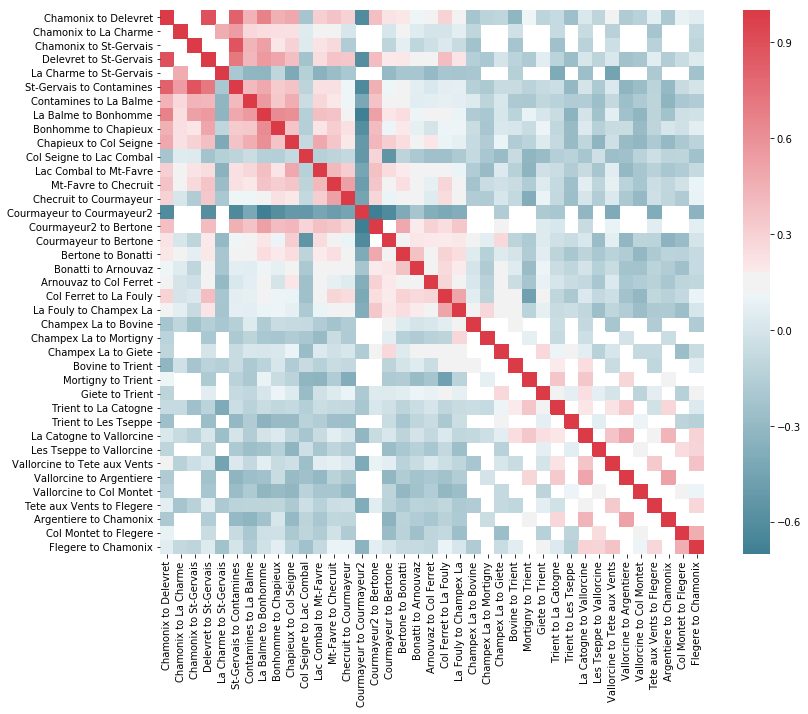

In [12]:
f, ax = plt.subplots(figsize=(14, 10))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [13]:
corr['max'] = corr[corr < 1].idxmax()

In [14]:
corr['max_val'] = corr[corr < 1].max()

In [15]:
max1 = corr['max']
max_val = corr['max_val']
frames = [max1, max_val]
maxy = pd.concat(frames, axis=1)

In [16]:
maxy

,max,max_val
Chamonix to Delevret,Delevret to St-Gervais,0.889975
Chamonix to La Charme,St-Gervais to Contamines,0.542004
Chamonix to St-Gervais,St-Gervais to Contamines,0.878938
Delevret to St-Gervais,Chamonix to Delevret,0.889975
La Charme to St-Gervais,Chamonix to La Charme,0.474698
St-Gervais to Contamines,Chamonix to St-Gervais,0.878938
Contamines to La Balme,La Balme to Bonhomme,0.559965
La Balme to Bonhomme,Chamonix to Delevret,0.662264
Bonhomme to Chapieux,La Balme to Bonhomme,0.625177
Chapieux to Col Seigne,La Balme to Bonhomme,0.607323


In [17]:
maxy.sort_values(by = 'max_val').head(10)

,max,max_val
Courmayeur to Courmayeur2,Champex La to Giete,-0.164661
Vallorcine to Col Montet,Les Tseppe to Vallorcine,0.172612
Champex La to Bovine,La Fouly to Champex La,0.174307
Trient to Les Tseppe,Champex La to Giete,0.182461
Bovine to Trient,La Catogne to Vallorcine,0.246631
Giete to Trient,Champex La to Giete,0.266809
Champex La to Giete,Giete to Trient,0.266809
Champex La to Mortigny,La Fouly to Champex La,0.27273
Col Seigne to Lac Combal,Courmayeur2 to Bertone,0.283425
Les Tseppe to Vallorcine,Flegere to Chamonix,0.288552


In [18]:
maxy.sort_values(by = 'max_val', ascending=False).head(10)

,max,max_val
Chamonix to Delevret,Delevret to St-Gervais,0.889975
Delevret to St-Gervais,Chamonix to Delevret,0.889975
Chamonix to St-Gervais,St-Gervais to Contamines,0.878938
St-Gervais to Contamines,Chamonix to St-Gervais,0.878938
La Balme to Bonhomme,Chamonix to Delevret,0.662264
Bonhomme to Chapieux,La Balme to Bonhomme,0.625177
Chapieux to Col Seigne,La Balme to Bonhomme,0.607323
Contamines to La Balme,La Balme to Bonhomme,0.559965
Chamonix to La Charme,St-Gervais to Contamines,0.542004
Courmayeur2 to Bertone,La Balme to Bonhomme,0.524189


In [19]:
corr = corr.filter(like='to')

In [20]:
allstage = corr.stack().reset_index()

In [21]:
allstage.insert(0, 'Value1', pd.factorize(allstage['level_0'])[0] + 1)
allstage.insert(2, 'Value2', pd.factorize(allstage['level_1'])[0] + 1)

In [22]:
allstage

,Value1,level_0,Value2,level_1,0
0,1,Chamonix to Delevret,1,Chamonix to Delevret,1.000000
1,1,Chamonix to Delevret,2,Delevret to St-Gervais,0.889975
2,1,Chamonix to Delevret,3,St-Gervais to Contamines,0.811678
3,1,Chamonix to Delevret,4,Contamines to La Balme,0.437039
4,1,Chamonix to Delevret,5,La Balme to Bonhomme,0.662264
5,1,Chamonix to Delevret,6,Bonhomme to Chapieux,0.451661
6,1,Chamonix to Delevret,7,Chapieux to Col Seigne,0.487545
7,1,Chamonix to Delevret,8,Col Seigne to Lac Combal,-0.218272
8,1,Chamonix to Delevret,9,Lac Combal to Mt-Favre,0.311538
9,1,Chamonix to Delevret,10,Mt-Favre to Checruit,0.365291


In [23]:
allstage.rename(columns={0: 'correlation'}, inplace=True)

In [24]:
allstage['Gap'] = allstage['Value2'] - allstage['Value1']

In [25]:
allstage['Gap'] = allstage['Gap'].abs()

In [26]:
allstage

,Value1,level_0,Value2,level_1,correlation,Gap
0,1,Chamonix to Delevret,1,Chamonix to Delevret,1.000000,0
1,1,Chamonix to Delevret,2,Delevret to St-Gervais,0.889975,1
2,1,Chamonix to Delevret,3,St-Gervais to Contamines,0.811678,2
3,1,Chamonix to Delevret,4,Contamines to La Balme,0.437039,3
4,1,Chamonix to Delevret,5,La Balme to Bonhomme,0.662264,4
5,1,Chamonix to Delevret,6,Bonhomme to Chapieux,0.451661,5
6,1,Chamonix to Delevret,7,Chapieux to Col Seigne,0.487545,6
7,1,Chamonix to Delevret,8,Col Seigne to Lac Combal,-0.218272,7
8,1,Chamonix to Delevret,9,Lac Combal to Mt-Favre,0.311538,8
9,1,Chamonix to Delevret,10,Mt-Favre to Checruit,0.365291,9


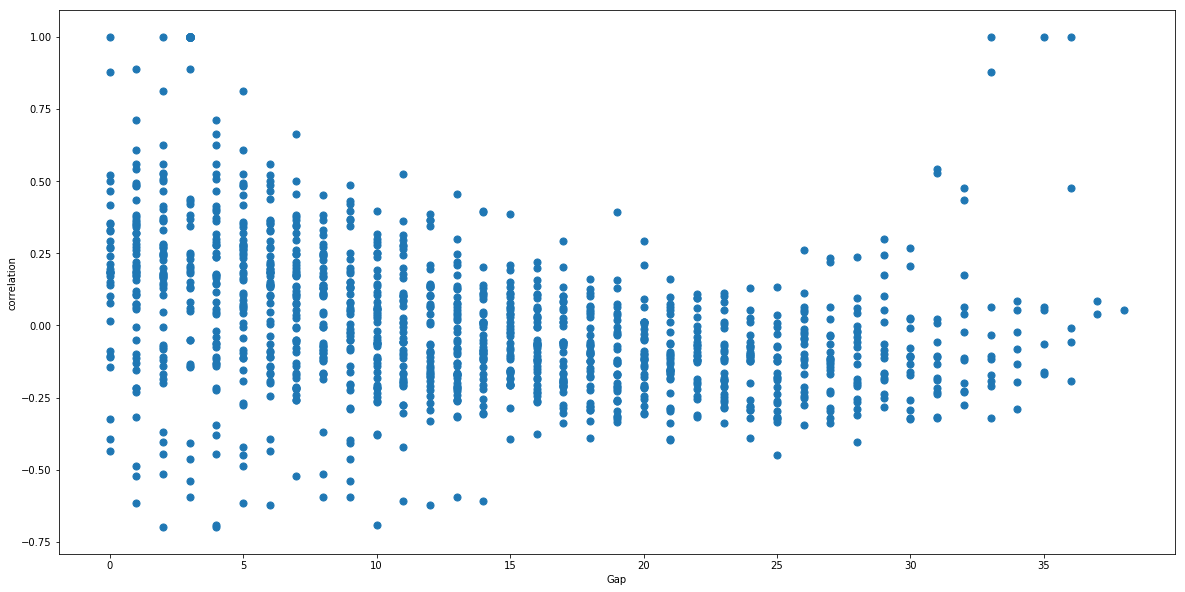

In [27]:
allstage.plot.scatter(x='Gap', y='correlation', figsize=(20, 10), s=50)

# Cummulative Distance

We now look at relative pace in relation to where the stage occurs in the race

In [28]:
dist = pd.read_csv('../../raw/cummulative_distance.csv', encoding = "ISO-8859-1")

In [29]:
dist

,Chamonix to Delevret,Chamonix to Col de Voza,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,Col de Voza to Contamines,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,Contamines to Bonhomme,La Balme to Bonhomme,La Balme to Chapieux,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Refuge Elisabeth,Col Seigne to Lac Combal,Col Seigne to Mt-Favre,Refuge Elisabeth to Mt-Favre,Refuge Elisabeth to Checruit,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Mt-Favre to Courmayeur,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Villaz,Courmayeur2 to Bertone,Courmayeur to Bertone,Villaz to Bertone,Bertone to Refuge Elena,Bertone to Bonatti,Refuge Elena to Col Ferret,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Peulaz,Col Ferret to La Fouly,La Peulaz to La Fouly,La Fouly to Praz de Fort,La Fouly to Champex La,Praz de Fort to Champex La,Praz de Fort to Champex den Bas,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Champex den Bas to Bovine,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne 2011,Trient to La Catogne,Trient to Les Tseppe,Trient to Vallorcine,La Catogne to Vallorcine,La Catogne to Vallorcine 2011,Les Tseppe to Vallorcine,Vallorcine to La Gardes,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,La Gardes to Chamonix,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,Flegere to Chamonix 2016
0,13.6,NaN,16,21.5,21.2,NaN,21.5,31.5,39.6,NaN,45.1,NaN,50.2,60.5,NaN,65.4,NaN,NaN,NaN,69.4,73.9,NaN,78,78.9,NaN,82.9,82.9,NaN,NaN,90.3,NaN,95.5,100,NaN,110,NaN,NaN,125.6,NaN,NaN,135.5,139.3,136.9,NaN,141.8,147.1,141.8,152.4,147.1,146.6,NaN,153.1,158.4,152.4,NaN,160.8,164.7,156.1,NaN,164.1,173.4,163.1,170.5,171.5


In [30]:
dist = dist.dropna(axis='columns')

In [31]:
cumm = dist.iloc[0]

In [32]:
cumm.head()

Chamonix to Delevret       13.6
Chamonix to La Charme      16.0
Chamonix to St-Gervais     21.5
Delevret to St-Gervais     21.2
La Charme to St-Gervais    21.5
Name: 0, dtype: float64

In [33]:
cumm

Chamonix to Delevret              13.6
Chamonix to La Charme             16.0
Chamonix to St-Gervais            21.5
Delevret to St-Gervais            21.2
La Charme to St-Gervais           21.5
St-Gervais to Contamines          31.5
Contamines to La Balme            39.6
La Balme to Bonhomme              45.1
Bonhomme to Chapieux              50.2
Chapieux to Col Seigne            60.5
Col Seigne to Lac Combal          65.4
Lac Combal to Mt-Favre            69.4
Mt-Favre to Checruit              73.9
Checruit to Courmayeur            78.0
Courmayeur to Courmayeur2         78.9
Courmayeur2 to Bertone            82.9
Courmayeur to Bertone             82.9
Bertone to Bonatti                90.3
Bonatti to Arnouvaz               95.5
Arnouvaz to Col Ferret           100.0
Col Ferret to La Fouly           110.0
La Fouly to Champex La           125.6
Champex La to Bovine             135.5
Champex La to Mortigny           139.3
Champex La to Giete              136.9
Bovine to Trient         

In [34]:
df = pd.DataFrame({'Cumm_Dist': cumm})
df.head()

,Cumm_Dist
Chamonix to Delevret,13.6
Chamonix to La Charme,16.0
Chamonix to St-Gervais,21.5
Delevret to St-Gervais,21.2
La Charme to St-Gervais,21.5


In [35]:
df.index.names = ['Stage']

In [36]:
df.head()

,Cumm_Dist
Stage,
Chamonix to Delevret,13.6
Chamonix to La Charme,16.0
Chamonix to St-Gervais,21.5
Delevret to St-Gervais,21.2
La Charme to St-Gervais,21.5


In [37]:
df1.head()

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
0,0.753222,NaN,NaN,0.623899,NaN,0.776253,0.924588,1.411793,0.710231,1.170149,0.576727,1.345244,0.746830,0.805199,NaN,NaN,1.518699,0.954236,0.925107,1.694363,0.759136,0.813869,NaN,NaN,1.145260,NaN,NaN,0.870184,NaN,1.227001,NaN,1.104782,NaN,NaN,1.110652,NaN,NaN,1.285825,0.746751
1,0.725186,NaN,NaN,0.636801,NaN,0.775141,0.917256,1.423023,0.700323,1.141054,0.570283,1.328507,0.740473,0.809278,NaN,NaN,1.572350,0.970387,0.959610,1.722551,0.757536,0.817181,NaN,NaN,1.237284,NaN,NaN,0.812772,NaN,1.229881,NaN,1.019452,NaN,NaN,1.108742,NaN,NaN,1.310308,0.714621
2,0.754073,NaN,NaN,0.594760,NaN,0.748073,0.949574,1.464821,0.773853,1.198589,0.605583,1.362966,0.765704,0.855888,NaN,NaN,1.552124,0.949336,0.886702,NaN,1.507707,0.798430,NaN,NaN,1.173967,NaN,NaN,0.724016,NaN,1.254344,NaN,1.019708,NaN,NaN,1.077078,NaN,NaN,1.333577,0.649126
3,0.707568,NaN,NaN,0.586535,NaN,0.728818,0.869172,1.566990,0.769008,1.219464,0.644599,1.368884,0.760429,0.872728,NaN,NaN,1.652724,0.970093,0.970140,1.775327,0.692422,0.782060,NaN,NaN,1.139795,NaN,NaN,0.819529,NaN,1.219328,NaN,0.987162,NaN,NaN,1.015944,NaN,NaN,1.237265,0.644014
4,0.713602,NaN,NaN,0.588763,NaN,0.774160,0.917371,1.371209,0.689753,1.143962,0.541024,1.160253,0.715978,0.835437,NaN,NaN,1.507509,0.979475,0.894280,1.649727,0.813795,1.041884,NaN,NaN,1.669222,NaN,NaN,0.692907,NaN,1.134444,NaN,0.890633,NaN,NaN,1.166875,NaN,NaN,1.394681,0.713055


In [38]:
mean = df1.describe()

In [39]:
mean

,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix
count,14876.000000,1423.000000,2281.000000,14866.000000,2090.000000,19202.000000,18400.000000,18257.000000,18279.000000,17545.000000,17487.000000,16950.000000,16804.000000,16920.000000,4154.000000,1993.000000,13413.000000,15222.000000,15098.000000,14121.000000,14070.000000,12955.000000,4498.000000,1189.000000,6586.000000,4478.000000,1171.000000,6576.000000,10279.000000,1702.000000,10286.000000,1702.000000,9029.000000,1136.000000,1690.000000,9023.000000,1133.000000,1690.000000,10705.000000
mean,0.622081,0.401450,0.590125,0.541825,1.181056,0.709813,0.870699,1.224550,0.713571,1.008524,0.830711,1.282120,0.682165,0.821890,2.667199,1.484148,1.746171,0.859237,0.906194,1.558728,0.744611,0.915720,1.279973,1.255935,1.277056,1.069963,1.300974,0.925594,1.583509,1.457806,0.830074,1.196277,1.442096,0.883971,1.387379,1.053348,0.893650,1.320420,0.759243
std,0.113144,0.096696,0.105927,0.123561,0.621565,0.152407,0.137874,0.171411,0.155860,0.129484,0.340049,0.193202,0.135010,0.209363,1.197969,0.253914,0.333147,0.127117,0.166449,0.221193,0.149422,0.127116,0.200803,0.235297,0.172420,0.174764,0.209904,0.210070,0.272511,0.268796,0.172387,0.177533,0.209751,0.161387,0.323242,0.322989,0.166836,0.193581,0.177008
min,0.316380,0.200993,0.113006,0.243049,0.138907,0.112865,0.150230,0.140398,0.219135,0.457215,0.135125,0.401867,0.219137,0.156866,0.137716,0.941639,0.727714,0.526027,0.309790,0.821684,0.317904,0.399994,0.648498,0.677944,0.798841,0.340754,0.766191,0.512954,0.869144,0.916388,0.352344,0.736503,0.824918,0.535007,0.735447,0.479421,0.516093,0.774316,0.261516
25%,0.552414,0.338886,0.533147,0.467061,0.634080,0.625288,0.786544,1.120922,0.623290,0.928262,0.600557,1.167170,0.604938,0.713391,1.874636,1.328327,1.571147,0.786421,0.813036,1.421695,0.653601,0.834809,1.147920,1.134316,1.162571,0.968947,1.163169,0.804809,1.432912,1.295049,0.727281,1.093349,1.309622,0.785162,1.205737,0.913235,0.779481,1.198373,0.644240
50%,0.603230,0.377217,0.573142,0.518189,0.825664,0.679685,0.851785,1.207297,0.691206,0.994741,0.677393,1.260289,0.666545,0.788535,2.657232,1.423969,1.760681,0.840522,0.879366,1.530784,0.710860,0.899892,1.253388,1.222474,1.252781,1.062681,1.281785,0.907699,1.551941,1.418646,0.811626,1.187710,1.423249,0.859324,1.342862,1.021805,0.876558,1.303897,0.741237
75%,0.661502,0.426914,0.616045,0.582969,1.856351,0.748002,0.928489,1.300607,0.770247,1.068673,1.095608,1.362959,0.732247,0.875856,3.426818,1.578852,1.939325,0.909575,0.960700,1.656987,0.785584,0.976086,1.378682,1.325159,1.357239,1.150902,1.427029,1.014516,1.690931,1.563617,0.911847,1.283895,1.549793,0.954102,1.501128,1.143807,0.994875,1.415982,0.850239
max,1.193296,1.178277,1.161533,1.647459,2.731925,1.992614,2.773105,2.963674,2.874221,2.721009,3.714351,4.544445,2.781339,5.199426,8.337885,3.280075,4.451128,2.943446,4.048218,5.249817,2.545999,3.371058,3.175288,5.295099,3.127493,3.358973,2.897426,4.303148,7.625359,5.001980,3.782223,4.397996,4.309459,2.908446,6.741470,8.159805,1.586393,3.821133,3.433522


In [40]:
mean = mean.iloc[1]

In [41]:
mean = pd.DataFrame({'MRP': mean})
mean.head()

,MRP
Chamonix to Delevret,0.622081
Chamonix to La Charme,0.401450
Chamonix to St-Gervais,0.590125
Delevret to St-Gervais,0.541825
La Charme to St-Gervais,1.181056


In [42]:
mean.index.names = ['Stage']

In [43]:
mean.head()

,MRP
Stage,
Chamonix to Delevret,0.622081
Chamonix to La Charme,0.401450
Chamonix to St-Gervais,0.590125
Delevret to St-Gervais,0.541825
La Charme to St-Gervais,1.181056


In [44]:
df2 = pd.concat([df, mean], axis=1)

In [45]:
df2

,Cumm_Dist,MRP
Argentiere to Chamonix,173.4,0.893650
Arnouvaz to Col Ferret,100.0,1.558728
Bertone to Bonatti,90.3,0.859237
Bonatti to Arnouvaz,95.5,0.906194
Bonhomme to Chapieux,50.2,0.713571
Bovine to Trient,141.8,1.069963
Chamonix to Delevret,13.6,0.622081
Chamonix to La Charme,16.0,0.401450
Chamonix to St-Gervais,21.5,0.590125
Champex La to Bovine,135.5,1.279973


In [46]:
df2 = df2.fillna(method='ffill')

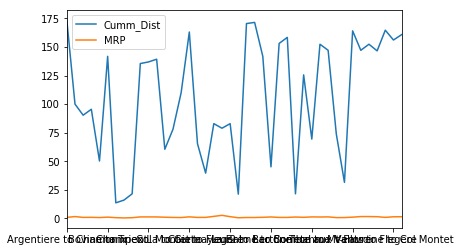

In [47]:
df2.plot()

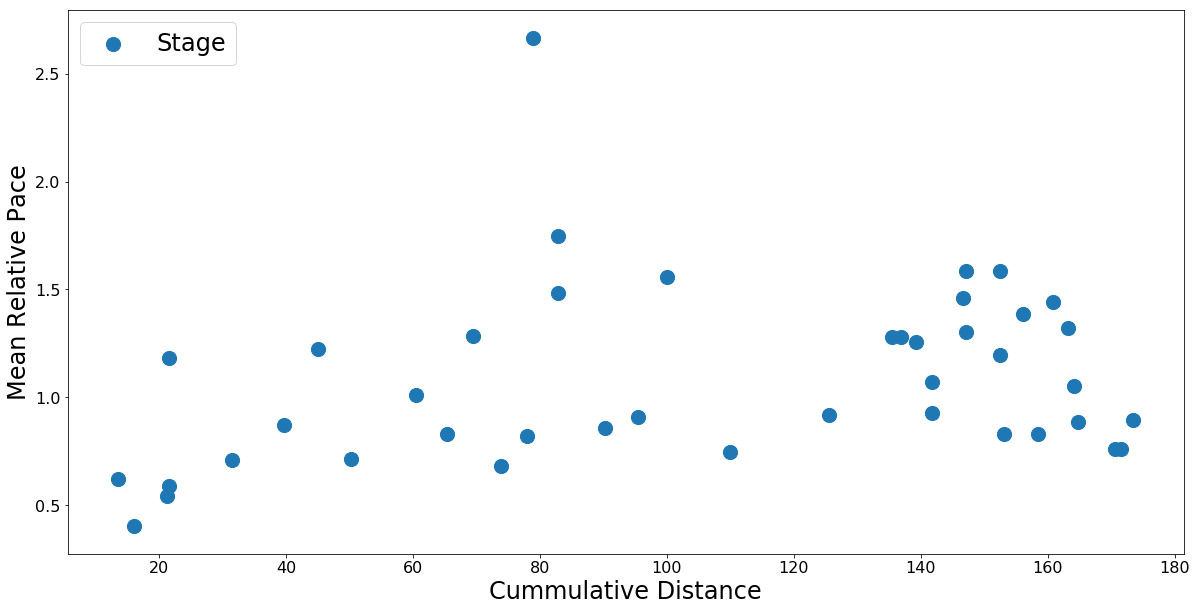

In [48]:
ax = df2.plot.scatter(x='Cumm_Dist', y='MRP', figsize=(20, 10), s=200, fontsize = 16)
ax.set_ylabel('Mean Relative Pace', fontsize = 24)
ax.set_xlabel('Cummulative Distance', fontsize = 24)
ax.legend(['Stage'], frameon=True, ncol=2, loc='upper left', prop={'size': 24})

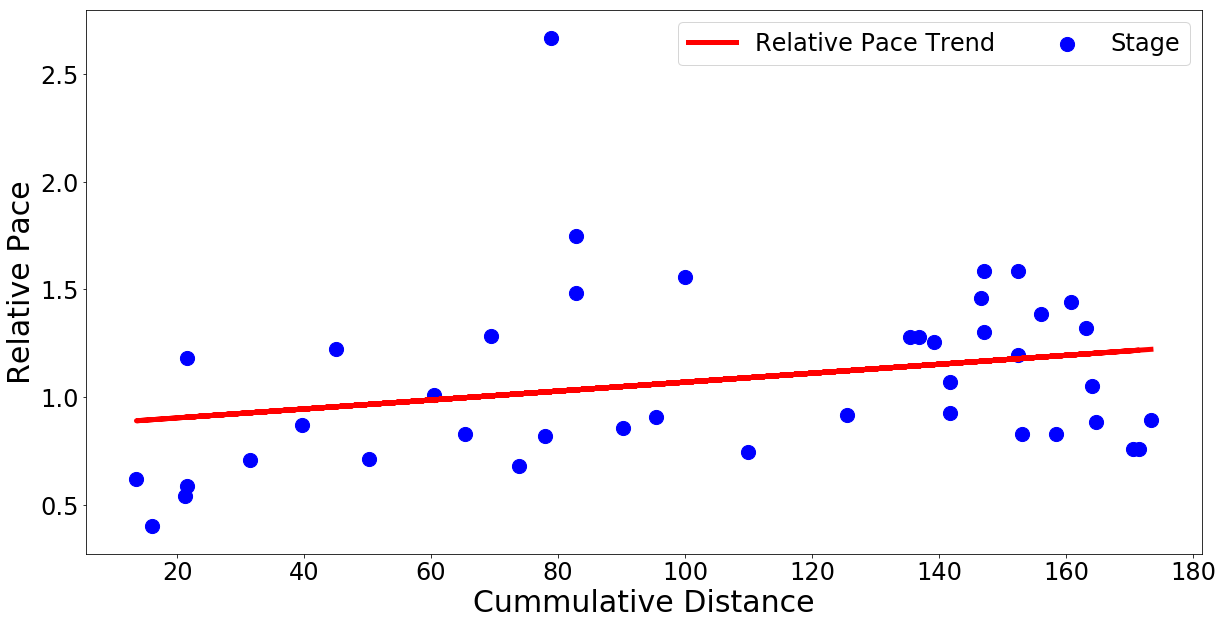

In [49]:
fig = plt.figure()
ax1 = df2.plot(kind='scatter', x='Cumm_Dist', y='MRP', color='blue', figsize=(20, 10), fontsize = 24, s=200)  
x = df2['Cumm_Dist']
y = df2['MRP']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth = 5)

ax1.set_ylabel('Relative Pace', fontsize = 30)
ax1.set_xlabel('Cummulative Distance', fontsize = 30)
fig.suptitle('Relative pace at each stage', fontsize=20)
ax1.legend(['Relative Pace Trend', 'Stage'], frameon = True, ncol=2, loc='upper right', fontsize = 24)

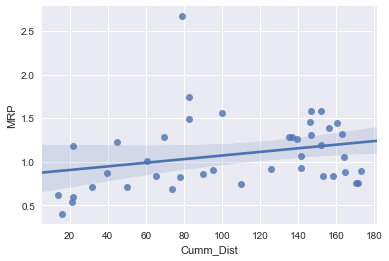

In [50]:
sns.set(color_codes=True)
ax = sns.regplot(x="Cumm_Dist", y="MRP", data=df2)

Text(0.5,0,'Cummulative Distance')

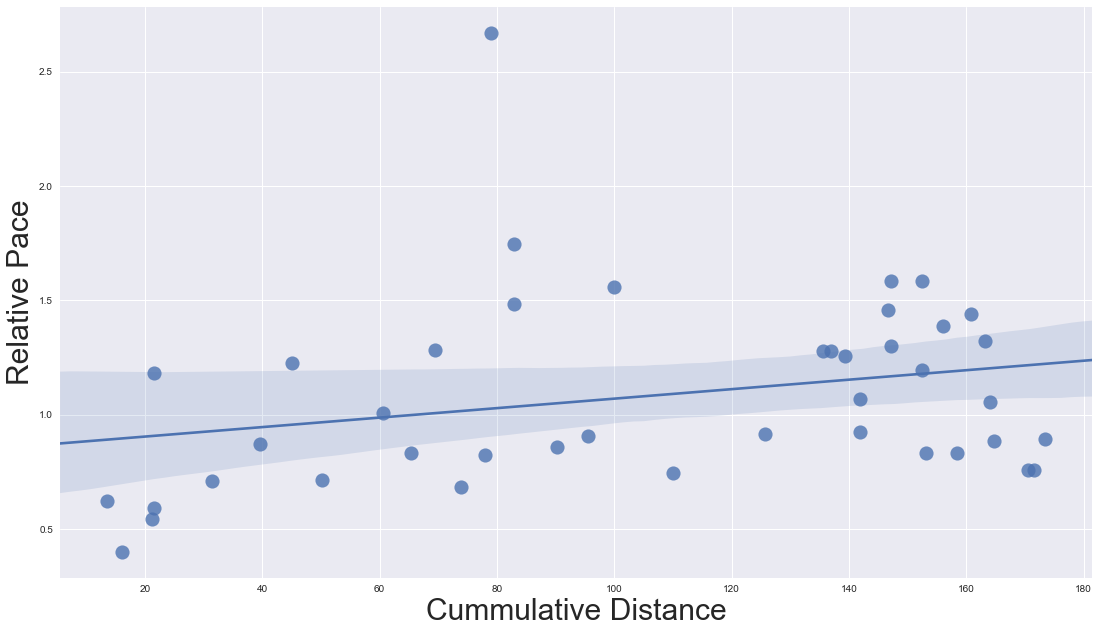

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.set(font_scale=1)
sns.regplot('Cumm_Dist', 'MRP', data=df2, scatter_kws={'s':200})
ax.set_ylabel('Relative Pace', fontsize = 30)
ax.set_xlabel('Cummulative Distance', fontsize = 30)

When looking at the mean relative pace of each stage we see how unique it is. Courmayeur to Courmayeur2 is the only stage above 2. This graphs tells us a lot of information. Firstly, as the distance of the race increases, so does the relative pace. On average, runners stay under their relative pace until 70 kilometres. After that, the nature of the stages cause runners to run slower than their relative pace. The second thing this graph shows is that there is more variety in the route towards the end of the race. The opening stages are spread apart, with a few exceptions, as the route is somewhat consistent until 130 kilometres. After this point, the route seems to vary a lot, which is why we see the cluster towards the between 130 and 170 kilometres. 

In [52]:
maxy.index.names = ['Stage']

In [53]:
df6 = pd.concat([df, maxy], axis=1)

In [54]:
df6

,Cumm_Dist,max,max_val
Argentiere to Chamonix,173.4,Vallorcine to Argentiere,0.52015
Arnouvaz to Col Ferret,100.0,Courmayeur2 to Bertone,0.296579
Bertone to Bonatti,90.3,Courmayeur2 to Bertone,0.493813
Bonatti to Arnouvaz,95.5,Bertone to Bonatti,0.372347
Bonhomme to Chapieux,50.2,La Balme to Bonhomme,0.625177
Bovine to Trient,141.8,La Catogne to Vallorcine,0.246631
Chamonix to Delevret,13.6,Delevret to St-Gervais,0.889975
Chamonix to La Charme,16.0,St-Gervais to Contamines,0.542004
Chamonix to St-Gervais,21.5,St-Gervais to Contamines,0.878938
Champex La to Bovine,135.5,La Fouly to Champex La,0.174307
